# Tiền xử lí dữ liệu

1. Đọc dữ liệu

In [1]:
%load_ext autoreload
%autoreload 2

from modules.file import CPandasFile

In [2]:
cholesterol_raw = CPandasFile().readCsv(r'./data/dataset_2190_cholesterol.csv')

cholesterol_raw

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236


2. Kiểm tra `cholesterol_raw` có các feature mà chỉ chứa độc nhất một vài giá trị hay ko.

In [3]:
from modules.preprocessing import CPreprocessing

secretary = CPreprocessing()

In [4]:
secretary.unique(cholesterol_raw)

,Number of unique values,Values
age,41,"[63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 5..."
sex,2,"[1, 0]"
cp,4,"[1, 4, 3, 2]"
trestbps,50,"[145, 160, 120, 130, 140, 172, 150, 110, 132, ..."
fbs,2,"[1, 0]"
restecg,3,"[2, 0, 1]"
thalach,91,"[150, 108, 129, 187, 172, 178, 160, 163, 147, ..."
exang,2,"[0, 1]"
oldpeak,40,"[2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, ..."
slope,3,"[3, 2, 1]"


> **Nhận xét**
> * Các feature `age`, `trestbps`, `thalach`, `oldpeak`, `chol` là các **continouse variable**, còn lại là các **categorical variable**.

3. Kiểm tra xem `cholesterol_raw` có chứa các duplicate sample ko.

In [5]:
secretary.duplicate(cholesterol_raw)

'The data does not contain any duplicate sample.'

> **Nhận xét**
> * `cholesterol_raw` ko chứa các mẫu trùng nhau.

4. Kiểm tra kiểu dữ liệu của các feature

In [6]:
cholesterol_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


> **Nhận xét**
> * Hai feature `ca` và `thal` khi kiểm tra mang giá trị số nhưng khi kiểm tra lại là `object` vì có chưa các giá trị là `?` $\Rightarrow$ chuẩn lại thành numeric.
> * Ở đây class `?` của hai feature `ca` và `thal` dc thay bằng giá trị số là 4, đồng thời ép kiểu dữ liệu của hai feature này về dạng numeric.

In [7]:
cholesterol_raw['ca'] = cholesterol_raw['ca'].replace('?', 4)
cholesterol_raw['ca'] = cholesterol_raw['ca'].astype(int)
cholesterol_raw['thal'] = cholesterol_raw['thal'].replace('?', 4)
cholesterol_raw['thal'] = cholesterol_raw['thal'].astype(int)

cholesterol_raw.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,4.729373,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,1.934189,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000,564.000000


5. Kiểm tra các **continous variable** có chứa outliers hay ko.

In [8]:
from modules.drawer import CDrawer

drawer = CDrawer()

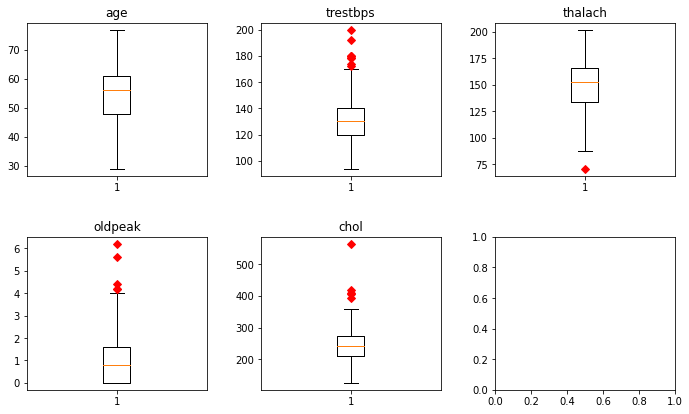

In [9]:
drawer.boxplotGrid((2, 3), cholesterol_raw[['age', 'trestbps', 'thalach', 'oldpeak', 'chol']])

5.1. Xem xét số lượng outlier cho từng feature `trestbps`, `thalach`, `oldpeak`, `chol`

In [10]:
secretary.countOutliers(cholesterol_raw, ['trestbps', 'thalach', 'oldpeak', 'chol'])

,Feature,Number of outliers,Number of non-outiers
0,trestbps,2,301
1,thalach,1,302
2,oldpeak,2,301
3,chol,4,299


> **Nhận xét**
> * Nhìn chung, số lượng outlier chiếm ko đáng kể, ko nhất thiết phải loại bỏ.

5.2. Loại bỏ các giá trị outlier

In [11]:
cholesterol_without_outliers = secretary.removeOutliers(cholesterol_raw)

cholesterol_without_outliers

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,0,0,123,1,0.2,2,0,7,1,241
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131


In [12]:
cholesterol_raw.shape

(303, 14)

> **Nhận xét**
> * Việc loại bỏ các outliers khiến dữ liệu giảm đi 13 sample.

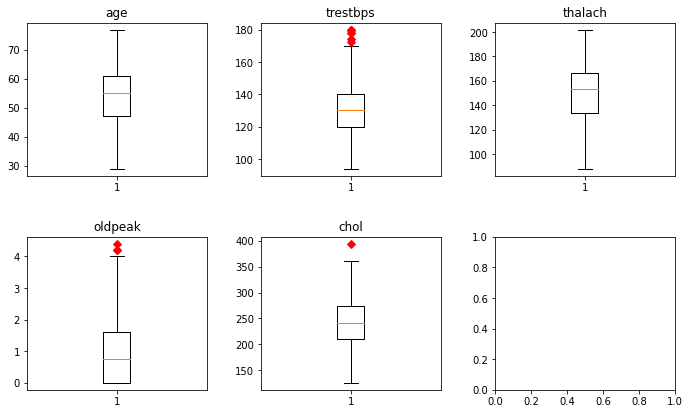

In [13]:
drawer.boxplotGrid((2, 3), cholesterol_without_outliers[['age', 'trestbps', 'thalach', 'oldpeak', 'chol']])

In [14]:
secretary.countOutliers(cholesterol_without_outliers, ['trestbps', 'thalach', 'oldpeak', 'chol'])

,Feature,Number of outliers,Number of non-outiers
0,trestbps,0,290
1,thalach,0,290
2,oldpeak,1,289
3,chol,1,289


In [15]:
cholesterol_without_outliers

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,0,0,123,1,0.2,2,0,7,1,241
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131


5. Kiểm tra dữ liệu có tồn tại missing value hay ko.

In [24]:
secretary.eda(cholesterol_without_outliers)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


> **Nhận xét**
> * Dữ liệu ko chứa các missing value, tuy nhiên ở các feature là categorical, phân phối giữa các class chưa đều, ta nên xem xét khả năng phải resampling lại các feature này.

6. Xem xét có cần scale dữ liệu hay ko

In [14]:
cholesterol_raw.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,4.729373,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,1.934189,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000,564.000000


> **Nhận xét**
> * Thang đó của các feature tương đối gần nhau, ko nhất thiết phải scale

7. Thay thế các thuộc tính có giá trị ko xác định


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,4.729373,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,1.934189,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000,564.000000


8. Kiểm tra tổng quát type của các feature 

In [15]:
cholesterol_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


9. Lựa chọn thuộc tính

9.1. Categorical

Feature sex: 42.887302
Feature cp: 38.298671
Feature fbs: 82.617816
Feature restecg: 138.434936
Feature exang: 78.475000
Feature slope: 24.499277
Feature ca: 165.605361
Feature thal: 112.354702
Feature num: 231.737418


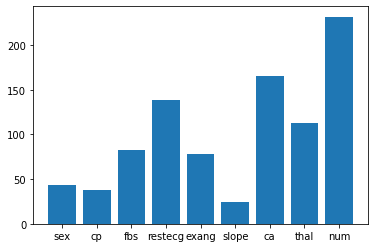

In [29]:
secretary.selectCategoricalFeature(cholesterol_without_outliers[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']], cholesterol_without_outliers['chol'])

> **Nhận xét**
> * Các categorical feature như `num`, `thal`, `ca`, `restecg`, `fbs`, `exang` hình như quan trọng hơn so với các feature còn lại, nên ta sẽ giữ lại các feature này để build model.

In [35]:
cholesterol_features_selection = cholesterol_without_outliers.copy()
cholesterol_features_selection = cholesterol_features_selection[['num', 'thal', 'ca', 'restecg', 'fbs', 'exang']]

cholesterol_features_selection

,num,thal,ca,restecg,fbs,exang
0,0,6,0,2,1,0
1,2,3,3,2,0,1
2,1,7,2,2,0,1
3,0,3,0,0,0,0
4,0,3,0,2,0,0
...,...,...,...,...,...,...
297,1,7,0,0,0,1
298,1,7,0,0,0,0
299,2,7,2,0,1,0
300,3,7,1,0,0,1


9.2. Numerical features

Feature age: 15.557903
Feature trestbps: 6.989950
Feature thalach: 0.868082
Feature oldpeak: 1.650295


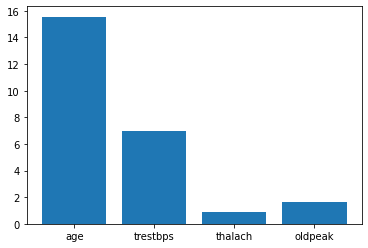

In [36]:
secretary.selectNumericalFeature(cholesterol_without_outliers[['age', 'trestbps', 'thalach', 'oldpeak']], cholesterol_without_outliers['chol'])

> **Nhận xét**
> * Hai feature continous variable là `age` và `trestbps` dường như quan trọng hơn so vs các feature còn lại $\Rightarrow$ chọn hai thuộc tính này để build model và bỏ các feature còn lại.

In [37]:
cholesterol_features_selection['age'] = cholesterol_without_outliers['age']
cholesterol_features_selection['trestbps'] = cholesterol_without_outliers['trestbps']
cholesterol_features_selection['chol'] = cholesterol_without_outliers['chol']

cholesterol_features_selection

,num,thal,ca,restecg,fbs,exang,age,trestbps,chol
0,0,6,0,2,1,0,63,145,233
1,2,3,3,2,0,1,67,160,286
2,1,7,2,2,0,1,67,120,229
3,0,3,0,0,0,0,37,130,250
4,0,3,0,2,0,0,41,130,204
...,...,...,...,...,...,...,...,...,...
297,1,7,0,0,0,1,57,140,241
298,1,7,0,0,0,0,45,110,264
299,2,7,2,0,1,0,68,144,193
300,3,7,1,0,0,1,57,130,131


10. Ghi ra file csv mới sau khi đã tiền xử lí dữ liệu.

In [39]:
CPandasFile().writeCsv(cholesterol_features_selection, r'./data/cholesterol.csv')

Success!
